In [72]:
import glob as gl
import os

folder_objetivo = "andres-data"

# Obtenemos todos los folders de la carpeta objetivo con glob
folders = gl.glob(folder_objetivo + "/*")

real_folders = []
for folder in folders:
    if os.path.isdir(folder):
        real_folders.append(folder)
        
print(real_folders)



['andres-data\\thread_1', 'andres-data\\thread_12', 'andres-data\\thread_2', 'andres-data\\thread_4', 'andres-data\\thread_6']


In [73]:
# Para cada real folder, obtenemos los folders dentro

subfolders = []
for folder in real_folders:
    subfolders.append(gl.glob(folder + "/*"))
    
    
print(subfolders)

[['andres-data\\thread_1\\load_25000', 'andres-data\\thread_1\\load_50000', 'andres-data\\thread_1\\load_75000', 'andres-data\\thread_1\\load_vs_events.png', 'andres-data\\thread_1\\load_vs_latency.png', 'andres-data\\thread_1\\mean.csv', 'andres-data\\thread_1\\merged.csv'], ['andres-data\\thread_12\\load_25000', 'andres-data\\thread_12\\load_50000', 'andres-data\\thread_12\\load_75000', 'andres-data\\thread_12\\load_vs_events.png', 'andres-data\\thread_12\\load_vs_latency.png', 'andres-data\\thread_12\\mean.csv', 'andres-data\\thread_12\\merged.csv'], ['andres-data\\thread_2\\load_25000', 'andres-data\\thread_2\\load_50000', 'andres-data\\thread_2\\load_75000', 'andres-data\\thread_2\\load_vs_events.png', 'andres-data\\thread_2\\load_vs_latency.png', 'andres-data\\thread_2\\mean.csv', 'andres-data\\thread_2\\merged.csv'], ['andres-data\\thread_4\\load_25000', 'andres-data\\thread_4\\load_50000', 'andres-data\\thread_4\\load_75000', 'andres-data\\thread_4\\load_vs_events.png', 'andres

In [77]:
# Para cada subfolder, obtenemos los archivos dentro .csv
csv_files = []
for subfolder in subfolders:
    for folder in subfolder:
        # Si no contiene mean, o merged lo añadimos
        if "mean" not in folder and "merged" not in folder:
            csv_files.append(gl.glob(folder + "/*.csv"))
            

# Eliminamos vacios
csv_files = [x for x in csv_files if x != []]

print(csv_files)
        

[['andres-data\\thread_1\\load_25000\\_25000_1.csv', 'andres-data\\thread_1\\load_25000\\_25000_1_monitor.csv'], ['andres-data\\thread_1\\load_50000\\_50000_1.csv', 'andres-data\\thread_1\\load_50000\\_50000_1_monitor.csv'], ['andres-data\\thread_1\\load_75000\\_75000_1.csv', 'andres-data\\thread_1\\load_75000\\_75000_1_monitor.csv'], ['andres-data\\thread_12\\load_25000\\_25000_12.csv', 'andres-data\\thread_12\\load_25000\\_25000_12_monitor.csv'], ['andres-data\\thread_12\\load_50000\\_50000_12.csv', 'andres-data\\thread_12\\load_50000\\_50000_12_monitor.csv'], ['andres-data\\thread_12\\load_75000\\_75000_12.csv', 'andres-data\\thread_12\\load_75000\\_75000_12_monitor.csv'], ['andres-data\\thread_2\\load_25000\\_25000_2.csv', 'andres-data\\thread_2\\load_25000\\_25000_2_monitor.csv'], ['andres-data\\thread_2\\load_50000\\_50000_2.csv', 'andres-data\\thread_2\\load_50000\\_50000_2_monitor.csv'], ['andres-data\\thread_2\\load_75000\\_75000_2.csv', 'andres-data\\thread_2\\load_75000\\_75

In [80]:
# Hacemos pandas
import pandas as pd
import matplotlib.pyplot as plt

dataframes = []
for csv_file in csv_files:
    # Creamos una carpeta images en subfolder
    # Get the folder path by removing the filename part
    folder_name = os.path.dirname(csv_file[0])
    
    os.makedirs(os.path.join(folder_name, "images"), exist_ok=True)
    
    
    # Read the csv file without monitor in the name
    df = pd.read_csv(csv_file[0])
    print(df)
    
    # Obtenemos datos como el load, threads
    load = df["load"].values
    threads = df["threads"].values
    
    # Leemos ahora el csv 1
    df1 = pd.read_csv(csv_file[1])
    print(df1)
    
    # Hacemos un plot imagen de ID, %CPU (global)
    plt.plot(df1["ID"], df1["%CPU (global)"])
    plt.xlabel("ID")
    plt.ylabel("%CPU (global)")
    plt.title(f"%CPU (global) Load : {load[0]} Threads : {threads[0]}")
    
    plt.savefig(os.path.join(folder_name, "images", f"plot_cpu_{load[0]}_{threads[0]}.png"))
    plt.close()
    
    # Ahora una imagen de ID, Capacidad de memoria utilizada
    plt.plot(df1["ID"], df1["Capacidad de memoria utilizada"])
    plt.xlabel("ID")
    plt.ylabel("Capacidad de memoria utilizada")
    plt.title(f"Capacidad de memoria utilizada Load : {load[0]} Threads : {threads[0]}")
    
    plt.savefig(os.path.join(folder_name, "images", f"plot_mem_{load[0]}_{threads[0]}.png"))
    plt.close()
    
    # Finalmente con ID, % Memoria utilizada
    plt.plot(df1["ID"], df1["% Memoria utilizada"])
    plt.xlabel("ID")
    plt.ylabel("% Memoria utilizada")
    plt.title(f"% Memoria utilizada Load : {load[0]} Threads : {threads[0]}")
    
    plt.savefig(os.path.join(folder_name, "images", f"plot_mem_perc_{load[0]}_{threads[0]}.png"))
    plt.close()
    
    # Finalmente un csv con la media de %CPU, memoria y %Memoria utilizada
    df1["%CPU (global)"].mean()
    df1["% Memoria utilizada"].mean()
    df1["Capacidad de memoria utilizada"].mean()
    
    df_mean = pd.DataFrame({
        "Mean %CPU" : [df1["%CPU (global)"].mean()],
        "Mean % Memoria utilizada" : [df1["% Memoria utilizada"].mean()],
        "Mean Capacidad de memoria utilizada" : [df1["Capacidad de memoria utilizada"].mean()],
        "load" : [load[0]],
        "threads" : [threads[0]]
    })
    
    df_mean.to_csv(os.path.join(folder_name, "images", f"mean_{load[0]}_{threads[0]}.csv"))
    
    

                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-14 22:47:21.005  25000        1             12          745.84   

   total_time  latency_min  latency_avg  latency_max  latency_95th  \
0     33.5171         1.28         1.34        10.55          1.64   

   latency_sum  events_avg  events_stddev  execution_time_avg  \
0     33500.81     25000.0            0.0             33.5008   

   execution_time_stddev  
0                    0.0  
    ID            Timestamp  %CPU (global)  Capacidad de memoria utilizada  \
0    0  2025-03-14 22:46:47             93                         1071776   
1    1  2025-03-14 22:46:48             93                         1074792   
2    2  2025-03-14 22:46:49             93                         1077568   
3    3  2025-03-14 22:46:51             93                         1078896   
4    4  2025-03-14 22:46:52             93                         1079000   
5    5  2025-03-14 22:46:53             93         

In [81]:
# Fusionar todos los mean en un solo csv
mean_files = gl.glob(folder_objetivo + "/*/*/images/mean_*.csv")

df_mean = pd.DataFrame()
for mean_file in mean_files:
    df = pd.read_csv(mean_file)
    df_mean = pd.concat([df_mean, df])
    
df_mean.to_csv(os.path.join(folder_objetivo, "mean_all.csv"))

In [ ]:
# Cogemos todos los csv bajo un folder del folder objetivo y fusionamos todos los csv que no tengan monitor en el nombre en un solo csv
for folder in real_folders:
    print(folder)
    csv_files = gl.glob(folder + "/*/*.csv")
    
    # Creamos un dataframe vacio
    df = pd.DataFrame()
    
    for csv_file in csv_files:
        if "monitor" not in csv_file:
            df = pd.concat([df, pd.read_csv(csv_file)])
        
    print(df)
    df.to_csv(os.path.join(folder, "merged.csv"), index=False)
    

andres-data\thread_1
                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-14 22:47:21.005  25000        1             12          745.84   
0  2025-03-14 22:50:14.453  50000        1             12          288.41   
0  2025-03-14 22:57:48.902  75000        1             12          165.06   

   total_time  latency_min  latency_avg  latency_max  latency_95th  \
0     33.5171         1.28         1.34        10.55          1.64   
0    173.3607         3.32         3.47        13.44          4.03   
0    454.3668         5.82         6.06        20.21          7.04   

   latency_sum  events_avg  events_stddev  execution_time_avg  \
0     33500.81     25000.0            0.0             33.5008   
0    173316.49     50000.0            0.0            173.3165   
0    454295.18     75000.0            0.0            454.2952   

   execution_time_stddev  
0                    0.0  
0                    0.0  
0                    0.0  
andres-data\thread_1

In [ ]:
from scipy import stats

# Cogemos los merged.csv y hacemos un plot de load (eje x) y events_seconds (eje y)

for folder in real_folders:
    df = pd.read_csv(os.path.join(folder, "merged.csv"))
    print(df)
    
    # Create bar chart for load vs events_seconds
    plt.figure(figsize=(10, 6))
    plt.bar(df["load"], df["events_seconds"], width=5000)
    plt.xlabel("Load")
    plt.ylabel("Events seconds")
    plt.title("Load vs Events seconds")
    
    plt.savefig(os.path.join(folder, "load_vs_events.png"))
    plt.close()
    
    # Create bar chart for load vs latency_avg
    plt.figure(figsize=(10, 6))
    plt.bar(df["load"], df["latency_avg"], width=5000)
    plt.xlabel("Load")
    plt.ylabel("Latency avg")
    plt.title("Load vs Latency avg")
    
    plt.savefig(os.path.join(folder, "load_vs_latency.png"))
    plt.close()
    
    # Finalmente, haz la media armonica de events_second y el mean de latency_avg en una tabla y guardala como imagen
    df2 = pd.DataFrame()
    # Use harmonic mean for events_seconds
    df2["events_seconds"] = [stats.hmean(df["events_seconds"])]
    df2["latency_avg"] = [df["latency_avg"].mean()]
    df2["latency_min"] = [df["latency_min"].mean()]
    df2["latency_max"] = [df["latency_max"].mean()]
    df2["latency_95th"] = [df["latency_95th"].mean()]
    
    print(df2)
    df2.to_csv(os.path.join(folder, "mean.csv"), index=False)


                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-14 22:47:21.005  25000        1             12          745.84   
1  2025-03-14 22:50:14.453  50000        1             12          288.41   
2  2025-03-14 22:57:48.902  75000        1             12          165.06   

   total_time  latency_min  latency_avg  latency_max  latency_95th  \
0     33.5171         1.28         1.34        10.55          1.64   
1    173.3607         3.32         3.47        13.44          4.03   
2    454.3668         5.82         6.06        20.21          7.04   

   latency_sum  events_avg  events_stddev  execution_time_avg  \
0     33500.81     25000.0            0.0             33.5008   
1    173316.49     50000.0            0.0            173.3165   
2    454295.18     75000.0            0.0            454.2952   

   execution_time_stddev  
0                    0.0  
1                    0.0  
2                    0.0  
   events_seconds  latency_avg  latency_m

                 timestamp   load  threads  total_threads  events_seconds  \
0  2025-03-14 22:47:21.005  25000        1             12          745.84   
1  2025-03-14 22:50:14.453  50000        1             12          288.41   
2  2025-03-14 22:57:48.902  75000        1             12          165.06   
0  2025-03-14 22:58:05.317  25000        2             12         1530.38   
1  2025-03-14 22:59:29.699  50000        2             12          593.09   
2  2025-03-14 23:03:10.612  75000        2             12          339.62   
0  2025-03-14 23:03:18.865  25000        4             12         3057.00   
1  2025-03-14 23:04:01.198  50000        4             12         1183.20   
2  2025-03-14 23:05:51.819  75000        4             12          678.44   
0  2025-03-14 23:05:57.745  25000        6             12         4272.46   
1  2025-03-14 23:06:28.114  50000        6             12         1650.47   
2  2025-03-14 23:07:47.840  75000        6             12          941.67   

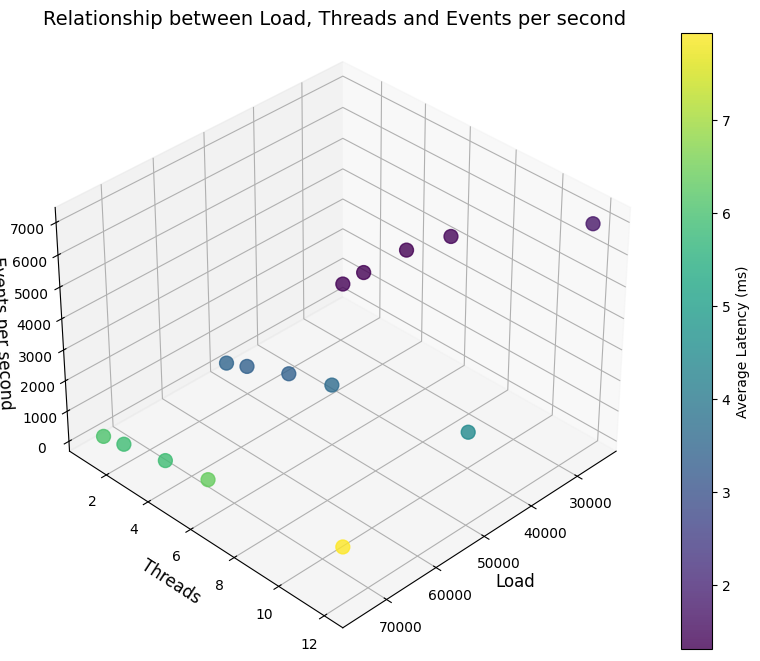

In [ ]:
# Ahora fusionamos todos los merged.csv en un solo csv en la raiz de la carpeta objetivo
df = pd.DataFrame()
for folder in real_folders:
    df = pd.concat([df, pd.read_csv(os.path.join(folder, "merged.csv") )])
    
    
# Ordenalo por las columnas load y threads
df = df.sort_values(by=["threads"])
print(df)
    
df.to_csv(os.path.join(folder_objetivo, "merged.csv"), index=False)

# Hacemos un plot 3d que vincula load, threads y events_seconds
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["load"], df["threads"], df["events_seconds"], 
                     c=df["latency_avg"], cmap='viridis', s=100, alpha=0.8)

# Add a color bar to show the scale
cbar = plt.colorbar(scatter)
cbar.set_label('Average Latency (ms)')

# Improve labels and title
ax.set_xlabel("Load", fontsize=12)
ax.set_ylabel("Threads", fontsize=12)
ax.set_zlabel("Events per second", fontsize=12)
ax.set_title("Relationship between Load, Threads and Events per second", fontsize=14)

# Adjust viewing angle for better visualization
ax.view_init(elev=35, azim=45)

# Enable interactive rotation
plt.ion()

# Save the figure
plt.savefig(os.path.join(folder_objetivo, "load_threads_events.png"), dpi=300, bbox_inches='tight')

# Display the plot (this will allow for interactive rotation in notebook)
plt.show()



# Plot de 2D threads vs latency_avg
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["threads"], df["latency_avg"], c=df["load"], cmap='viridis', s=100, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label('Load (events)', fontsize=10)
plt.xlabel("Threads")
plt.ylabel("Latency avg (ms)")
plt.title("Threads vs Latency avg (color by Load)")
plt.savefig(os.path.join(folder_objetivo, "threads_vs_latency.png"), dpi=300, bbox_inches='tight')
plt.close()


# Plot 2d threads vs events_seconds
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["threads"], df["events_seconds"], c=df["load"], cmap='viridis', s=100, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label('Load (events)', fontsize=10)
plt.xlabel("Threads")
plt.ylabel("Events per second")
plt.title("Threads vs Events per second (color by Load)")
plt.savefig(os.path.join(folder_objetivo, "threads_vs_events.png"), dpi=300, bbox_inches='tight')
plt.close()

